In [ ]:
import pandas as pd
import cv2
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

import math
import keras
import tensorflow
import pprint
from sklearn.model_selection import train_test_split
from keras import layers

import os

from tensorflow.python import keras
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split

import glob
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
import itertools

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [ ]:
labels_dict = {'a':0,'b':1,'c':2,'d':3,'e':4,'f':5}


images = []
labels = []
size = 200,200

In [ ]:
for i in ['a','b','c','d','e','f']:
    for img in glob.glob("Dataset_Nevin_600/" + i + "/*.jpg"):
        n = cv2.imread(img)
        gray = cv2.cvtColor(n,cv2.COLOR_BGR2GRAY)
        temp_img = cv2.resize(gray, size)
        images.append(temp_img)
        labels.append(labels_dict[i])
    print(i)

a
b
c
d
e
f


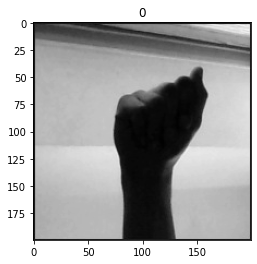

In [ ]:
imagebackup=images

plt.title(labels[0])
plt.imshow(images[0],cmap='gray')

In [ ]:
images=np.asarray(images)
images = images.astype('float32')/255.0

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(images, labels, test_size = 1/6, random_state = 30)

X_train = X_train.reshape(X_train.shape + (1,))
X_val = X_val.reshape(X_val.shape + (1,))

label_binarizer = LabelBinarizer()
y_train_encoded = label_binarizer.fit_transform(Y_train)
y_val_encoded = label_binarizer.fit_transform(Y_val)

In [ ]:
l2_lambda = 0.0001

In [ ]:
model = Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='valid', input_shape=(200,200,1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
    
model.add(layers.Conv2D(32, 3, 3, padding='valid', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
  
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))#

model.add(layers.Dense(6, kernel_initializer='glorot_uniform', activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
EPOCHS = 30

history = model.fit(
    x=X_train, 
    y=y_train_encoded,
    steps_per_epoch=len(X_train)//32,
    epochs=EPOCHS,
    validation_steps=len(X_val)//32,
    validation_data=(X_val, y_val_encoded)
)

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpizuz7th_.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpizuz7th_.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
75/75 [==============================] - 41s 397ms/step - loss: 1.8043 - accuracy: 0.1802 - val_loss: 1.7568 - val_accuracy: 0.2508
Epoch 2/30
75/75 [==============================] - 29s 390ms/step - loss: 1.6790 - accuracy: 0.3099 - val_loss: 1.4043 - val_accuracy: 0.4500
Epoch 3/30
75/75 [==============================] - 30s 397ms/step - loss: 1.2694 - accuracy: 0.5162 - val_los

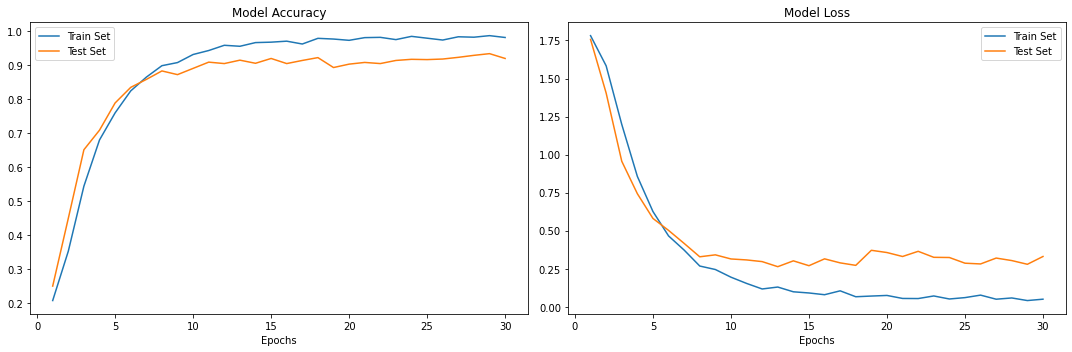

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, EPOCHS + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Test Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Test Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.title('Model Loss')

plt.tight_layout()
plt.savefig('model_performance.jpg')
plt.show()

In [ ]:
y_pred = model.predict_classes(X_val)
p = model.predict_proba(X_val)
target_names = ['a', 'b', 'c', 'd', 'e', 'f']
print (classification_report(np.argmax(y_val_encoded,axis=1), y_pred,target_names=target_names))
confusion_matrix = confusion_matrix(np.argmax(y_val_encoded,axis=1), y_pred)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


              precision    recall  f1-score   support

           a       0.90      0.90      0.90       185
           b       0.94      0.91      0.92       191
           c       0.98      0.96      0.97       211
           d       0.88      0.93      0.91       207
           e       0.88      0.85      0.86       205
           f       0.95      0.97      0.96       201

    accuracy                           0.92      1200
   macro avg       0.92      0.92      0.92      1200
weighted avg       0.92      0.92      0.92      1200



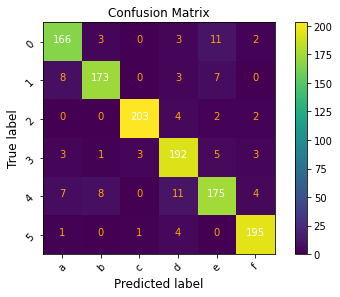

In [ ]:
target_names1 = ['0', '1', '2', '3', '4', '5']
plt.imshow(confusion_matrix, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names1, rotation=45)
thresh = confusion_matrix.max() / 2.

for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, confusion_matrix[i, j],
    horizontalalignment="center",
    color="white" if confusion_matrix[i, j] > thresh else "orange")
    
plt.tight_layout()
plt.title('Confusion Matrix', fontsize='12')
plt.ylabel('True label', fontsize='12')
plt.xlabel('Predicted label', fontsize='12')
plt.show()